###General Flow Description
in order to run this script, the file tree must exist in your google drive 'My Drive' folder.

contact me for sharing file tree - after approving, the shared folder needs to be added to drive (this can be done by adding the whole folder to your drive or by creating a shortcut in "My Drive to "shared with me" folders location)


general terminology:
site name -> {site_name}_{index}




#Preperations

##build connections


*   Define base file-tree paths
*   give permission and mount google drive

In [ ]:
import os, json
from google.colab import drive

MOUNT_POINT = '/content/drive' #constant - do not edit

MY_DRIVE_PATH = os.path.join(MOUNT_POINT, 'My Drive') #constant - do not edit

BASE_FOLDER_NAME = 'OMRI_RESEARCH_RESULTS'

BASE_FOLDER_PATH = os.path.join(MY_DRIVE_PATH,BASE_FOLDER_NAME)

SUPPORT_FOLDER_PATH = os.path.join(BASE_FOLDER_PATH,'support_files')

DEFAULT_OUTPUT_FOLDER = os.path.join(BASE_FOLDER_PATH, 'outputs')

DEFAULTֹ_IMS_DATA_FOLDER_NAME = 'IMS'

DEFAULTֹ_IMS_DATA_FOLDER_PATH = os.path.join(BASE_FOLDER_PATH, DEFAULTֹ_IMS_DATA_FOLDER_NAME)

drive.mount(MOUNT_POINT)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Configurations


*   sources calculation paramteres
*   colour coding for charts

In [ ]:
SOURCES_CONFIGURATIONS = {
    "MATA_NDVI":{
      "MODIS": {
        "min": 0.26,
        "max": 0.7,
        "average_window": 0.05,
        "images_per_month": 30
      },
      "S2": {
        "min": 0.2,
        "max": False,
        "average_window": 0.05,
        "images_per_month": 3
      },
      "L8": {
        "min": 0.15,
        "max": False,
        "average_window":False,
        "images_per_month": False
      },
      "VENuS": {
        "min": False,
        "max": False,
        "average_window": False,
        "images_per_month": False
      },
      "PLANET": {
        "min": -0.1,
        "max": 0.25,
        "average_window": False,
        "images_per_month": 30
      },
      "NSRS_EV_unclear": {
        "min": False,
        "max": False,
        "average_window": False,
        "images_per_month": False
      },
      "NSRS_DW_EV": {
        "min": False,
        "max": False,
        "average_window": False,
        "images_per_month": False
      },
      "NSRS_DS": {
        "min": False,
        "max": False,
        "average_window": False,
        "images_per_month": False
      }
  },
  "RH_NDVI": {
    "MODIS": {
      "min": False,
      "max": 0.8,
      "average_window": 0.1125,
      "images_per_month": 30
    },
    "S2": {
      "min": 0.4,
      "max": False,
      "average_window": 0.1005,
      "images_per_month": 5
    },
    "L8": {
      "min": 0.4,
      "max": False,
      "average_window": 0.1005,
      "images_per_month": 4
    },
    "NSRS_1": {
      "min": 0.2,
      "max": False,
      "average_window": 0.05,
      "images_per_month": 30
    },
    "NSRS_2": {
      "min": 0.2,
      "max": False,
      "average_window": 0.05,
      "images_per_month": 30
    },
    "NSRS_3": {
      "min": 0.2,
      "max": False,
      "average_window": 0.05,
      "images_per_month": 30,
      "general_factor": 1.4
    },
    "NSRS_1_B": {
      "min": 0.2,
      "max": False,
      "average_window": 0.05,
      "images_per_month": 30
    },
    "NSRS_2_B": {
      "min": 0.2,
      "max": False,
      "average_window": 0.05,
      "images_per_month": 30
    },
    "NSRS_3_B": {
      "min": 0.2,
      "max": False,
      "average_window": 0.05,
      "images_per_month": 30,
      "general_factor": 1.4
    }
  }
}

PLOTS_COLOUR_CONFIGURATIONS = {
    'default': 'cyan',
    'SATs': {
        'MODIS': 'darkgray',
        'S2': 'darkorange',
        'L8': 'gold',
        'VENuS': 'limegreen',
        'PLANET': 'blue'
        },
    'MATA_NDVI':{
        'NSRS_DS': 'darkviolet_solid',
        'NSRS_EV_unclear': 'darkviolet_dashed',
        'NSRS_DW_EV': 'darkviolet_dashdot'
        },
    'RH_NDVI':{
        'NSRS_1': 'yellowgreen_solid',
        'NSRS_2': 'olive_dashed',
        'NSRS_3': 'goldenrod_dashdot',
        'NSRS_1_B': 'yellowgreen_solid',
        'NSRS_2_B': 'olive_dashed',
        'NSRS_3_B': 'goldenrod_dashdot'
        },
      'IMS': {
          'RAINFALL': 'blue_columns',
          'TEMP': 'red_solid'
      }
}

PLOTS_CONFIGURATIONS = {
    'data_cleaning': {
        'title_fontsize': 110,
        'line_width': 8,
        'x_ticks_labelsize': 80,
        'y_label_fontsize': 80,
        'subtitle_fontsize': 60,
        'fig_size': (150, 50),
        'dpi': 100
        }
}


## Field Names Constants

In [ ]:
DATE_FIELD_NAME = 'DATE'
TIMESTAMP_FIELD_NAME = 'TS'
HIDE_FROM_LEGEND = '_Hidden'

ORG_NDVI_RAW_FIELD_NAME = 'NDVI_RAW'
NDVI_RAW_FIELD_NAME = 'NDVI RAW'
NDVI_FILTERED_FIELD_NAME = 'NDVI filtered'
NDVI_CLEAN_FIELD_NAME = 'NDVI clean'
NDVI_LOWESS_FIELD_NAME = 'NDVI lowess'

ORG_GCC_RAW_FIELD_NAME = 'GCC_RAW'
GCC_RAW_FIELD_NAME = 'GCC RAW'
GCC_NDVI_FILTERED_FIELD_NAME = 'GCC filtered'
GCC_CLEAN_FIELD_NAME = 'GCC clean'
GCC_LOWESS_FIELD_NAME = 'GCC lowess'

IMS_RAIN_CODE_FIELD_NAME = 'RAIN_CODE'
IMS_RAINFALL_FIELD_NAME = 'RAINFALL'
IMS_TEMPRATURE_FIELD_NAME = 'TEMP'


# Plots

In [ ]:
from typing import Dict, List
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.axes import Axes as ax
import pandas as pd
from datetime import datetime


def time_in_seconds(date_obj: datetime) -> int:
  epoch = datetime.utcfromtimestamp(0)
  delta = date_obj - epoch
  return delta.total_seconds()


def visualize_data_cleaning_flow(source_name: str, smoothed_data_df: pd.DataFrame, site_name: str):
  ndvi_keys = [key for key in smoothed_data_df if key.startswith('NDVI')]
  figures_num = len(ndvi_keys)
  fig, axes = plt.subplots(
      sharex=True,
      nrows=figures_num,
      ncols=1,
      figsize=PLOTS_CONFIGURATIONS['data_cleaning']['fig_size'],
      dpi=PLOTS_CONFIGURATIONS['data_cleaning']['dpi'],
      layout='constrained'
      )
  fig.suptitle(
      f'{source_name} Data Cleaning flow',
      size=PLOTS_CONFIGURATIONS['data_cleaning']['title_fontsize']
      )
  x = smoothed_data_df['DATE']
  if source_name in PLOTS_COLOUR_CONFIGURATIONS['SATs']:
      source_colour = PLOTS_COLOUR_CONFIGURATIONS['SATs'][source_name]
      source_linestyle = 'solid'
  elif source_name in PLOTS_COLOUR_CONFIGURATIONS[site_name]:
    source_colour_and_style = PLOTS_COLOUR_CONFIGURATIONS[site_name][source_name].split('_')
    source_colour = source_colour_and_style[0]
    source_linestyle = source_colour_and_style[1]

  else:
    source_colour = PLOTS_COLOUR_CONFIGURATIONS['default']
    source_linestyle = 'solid'
  for i, ndvi_key in enumerate(ndvi_keys):
    mask = np.isfinite(smoothed_data_df[ndvi_key])
    axes[i].set_title (
        f'{ndvi_key}',
        fontsize=PLOTS_CONFIGURATIONS['data_cleaning']['subtitle_fontsize']
        )
    axes[i].set_ylabel (
        'NDVI',
        fontsize=PLOTS_CONFIGURATIONS['data_cleaning']['y_label_fontsize']
        )
    axes[i].tick_params(
        labelsize=PLOTS_CONFIGURATIONS['data_cleaning']['x_ticks_labelsize']
    )
    axes[i].xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
    axes[i].plot(
    x[mask],
    smoothed_data_df[ndvi_key][mask],
    color = source_colour,
    linestyle =  source_linestyle,
    linewidth= PLOTS_CONFIGURATIONS['data_cleaning']['line_width'],
    label = 'DATE',
    in_layout=True
    )
  fig.savefig(os.path.join(DEFAULT_OUTPUT_FOLDER,'data_cleaning', site_name, f'{source_name}.png'))
  return None


def get_source_name_color_style(source_df_field_name):
  splitted_field_name = source_df_field_name.split(' ')
  source_name = splitted_field_name[-1]
  if source_name in PLOTS_COLOUR_CONFIGURATIONS['SATs']:
    source_colour = PLOTS_COLOUR_CONFIGURATIONS['SATs'][source_name]
    source_linestyle = 'solid'
  elif source_name in PLOTS_COLOUR_CONFIGURATIONS[site_name]:
    source_colour_and_style = PLOTS_COLOUR_CONFIGURATIONS[site_name][source_name].split('_')
    source_colour = source_colour_and_style[0]
    source_linestyle = source_colour_and_style[1]
  elif source_name == 'IMS':
    ims_data_type = splitted_field_name[0].replace('[mm]', '')
    source_colour_and_style = PLOTS_COLOUR_CONFIGURATIONS['IMS'][ims_data_type].split('_')
    source_colour = source_colour_and_style[0]
    source_linestyle = source_colour_and_style[1]
    source_name = source_df_field_name
    return source_name, source_colour, source_linestyle
  else:
    source_colour = PLOTS_COLOUR_CONFIGURATIONS['default']
    source_linestyle = 'solid'
  return source_name, source_colour, source_linestyle


def get_nsrs_timeframe(site_df: pd.DataFrame):
  filled_df = site_df.fillna(False)
  nsrs_fieldnames = []
  for key in site_df:
    splitted_key = key.split(' ')
    source_field_name = splitted_key[-1]
    source = source_field_name.split('_')[0]
    if source.startswith('NSRS'):
      nsrs_fieldnames.append(key)
  start_ind = None
  end_ind = 0
  for i, row in filled_df.iterrows():
    values_existance = [row[nsrs_field] for nsrs_field in nsrs_fieldnames]
    if any(values_existance):
      if not start_ind:
        start_ind = i
      else:
        if i < start_ind:
          start_ind = i
      if i > end_ind:
        end_ind = i
  return start_ind, end_ind


def plot_site_data(site_name: str, site_df: pd.DataFrame, focus_on_nsrs_time: bool = False):
  if focus_on_nsrs_time:
    start_ind, end_ind = get_nsrs_timeframe(site_df)
    site_df = site_df.loc[start_ind:end_ind, :]
  dates = np.array([dt.fromtimestamp(ts) for ts in site_df.index])

  fig, ax = plt.subplots(figsize=(20, 5))
  ax.set_title(f'{site_name} all data')
  if focus_on_nsrs_time:
    ax.set_title(f'{site_name} all data focused on NSRS')

  for source in site_df:
    if source == DATE_FIELD_NAME:
      continue
    source_name, source_colour, source_linestyle = get_source_name_color_style(
      source
      )
    mask = np.isfinite(site_df[source])
    if source_name.endswith('_B'):
      ax.plot(
          dates[mask],
          site_df[source][mask],
          color=source_colour,
          label=HIDE_FROM_LEGEND,
          linestyle=source_linestyle
          )
    elif source_name.startswith(IMS_RAINFALL_FIELD_NAME):
      ax1 = ax.twinx()
      plt.gca().invert_yaxis()
      ax1.bar(
          dates,
          site_df[source],
          label = source_name,
          )
    elif source_name.startswith(IMS_TEMPRATURE_FIELD_NAME):
      ax1 = ax.twinx()
      ax1.plot(
          dates[mask],
          site_df[source][mask],
          color=source_colour,
          label=source_name,
          linestyle=source_linestyle,
          linewidth= 0.4
          )
    else:
      ax.plot(
          dates[mask],
          site_df[source][mask],
          color=source_colour,
          label=source_name,
          linestyle=source_linestyle
          )
  fig.legend(
      loc='upper right',
      # bbox_to_anchor=(1.07, 0.2),
      ncol=2
      )
  fig.dpi = 400
  fig.tight_layout()
  out_filename = f'{site_name}_all_data.png'
  if focus_on_nsrs_time:
    out_filename = f'{site_name}_all_data_focused_on_NSRS.png'
  fig.savefig(os.path.join(DEFAULT_OUTPUT_FOLDER, 'graphs', site_name, out_filename), bbox_inches='tight')
  return None


def plot_data_avaiability(site_df: pd.DataFrame, focus_on_nsrs_time: bool = False):
  if focus_on_nsrs_time:
    start_ind, end_ind = get_nsrs_timeframe(site_df)
    site_df = site_df.loc[start_ind:end_ind, :]
  dates = np.array([dt.fromtimestamp(ts) for ts in site_df.index])

  fig, ax = plt.subplots(figsize=(20, 5))
  ax.set_title(f'{site_name} all data')
  if focus_on_nsrs_time:
    ax.set_title(f'{site_name} all data focused on NSRS')

  for source in site_df:
    if source == DATE_FIELD_NAME:
      continue
    source_name, source_colour, source_linestyle = get_source_name_color_style(
      source
      )
    # mask = np.isfinite(site_df[source])
    if source_name.endswith('_B'):
      ax.plot(
          dates,
          site_df[source],
          color=source_colour,
          label=HIDE_FROM_LEGEND,
          linestyle=source_linestyle
          )
    elif source_name.startswith(IMS_RAINFALL_FIELD_NAME):
      ax1 = ax.twinx()
      plt.gca().invert_yaxis()
      ax1.bar(
          dates,
          site_df[source],
          label = source_name,
          )
    elif source_name.startswith(IMS_TEMPRATURE_FIELD_NAME):
      ax1 = ax.twinx()
      ax1.plot(
          dates,
          site_df[source],
          color=source_colour,
          label=source_name,
          linestyle=source_linestyle,
          linewidth= 0.2
          )
    else:
      ax.plot(
          dates,
          site_df[source],
          color=source_colour,
          label=source_name,
          linestyle=source_linestyle
          )
  fig.legend(
      loc='upper right',
      # bbox_to_anchor=(1.07, 0.2),
      ncol=2
      )
  fig.dpi = 400
  fig.tight_layout()
  out_filename = f'{site_name}_data_avaiability.png'
  if focus_on_nsrs_time:
    out_filename = f'{site_name}_data_avaiability_focused_on_NSRS.png'
  fig.savefig(os.path.join(DEFAULT_OUTPUT_FOLDER, 'graphs', site_name, out_filename), bbox_inches='tight')
  return None


def plot_comaprative_data_to_nsrs(site_name: str, site_df: pd.DataFrame, sat_field: str):
  start_ind, end_ind = get_nsrs_timeframe(site_df)
  site_df = site_df.loc[start_ind:end_ind,:]
  dates = np.array([dt.fromtimestamp(ts) for ts in site_df.index])

  fig, ax = plt.subplots(figsize=(20, 5))

  fields_to_plot = [origin for origin in site_df if 'NSRS' in origin]
  fields_to_plot.append(sat_field)
  for source in fields_to_plot:
    source_name, source_colour, source_linestyle = get_source_name_color_style(
      source
      )
    ax.set_title(f'{site_name} NSRS comparison with {source_name}')
    mask = np.isfinite(site_df[source])
    if source_name.endswith('_B'):
      ax.plot(
          dates[mask],
          site_df[source][mask],
          color=source_colour,
          label=HIDE_FROM_LEGEND,
          linestyle=source_linestyle
          )
    elif source_linestyle == 'columns':
      ax1 = ax.twinx()
      plt.gca().invert_yaxis()
      ax1.bar(
          dates,
          site_df[source],
          label = source_name,
          )
    else:
      ax.plot(
          dates[mask],
          site_df[source][mask],
          color=source_colour,
          label=source_name,
          linestyle=source_linestyle
          )
  fig.legend(
      loc='upper right',
      # bbox_to_anchor=(1, 0.2),
      ncol=1
      )
  fig.dpi = 400
  fig.tight_layout()
  fig.savefig(os.path.join(DEFAULT_OUTPUT_FOLDER, 'graphs', site_name, f'{site_name}_NSRS_vs_{sat_field}.png'), bbox_inches='tight')
  return None


# Data processing

### generate file names list for site

In [ ]:
from typing import Dict, Union, List


def generate_sources_data_file_names_for_site(site_name: str, full_configurations_dict: Dict = SOURCES_CONFIGURATIONS, specify_source: Union[str,bool] = False) -> Union[List, str]:
  if specify_source:
    if specify_source.upper() in full_configurations_dict[site_name].keys():
      return os.path.join(BASE_FOLDER_PATH,site_name, f'{specify_source}.csv')
    else:
      raise Exception(f'{specify_source.upper()} not in source index for this site')
  else:
    return [os.path.join(BASE_FOLDER_PATH,site_name,f'{source}.csv') for source in full_configurations_dict[site_name].keys()]


### single source data cleaning

*   load raw results
*   filter extremes
*   filter by average group
*   lowess smoothing

In [ ]:
from typing import List, Dict
import pandas as pd
from datetime import datetime as dt
import numpy as np
import statsmodels.api as sm


def load_raw_results_csv(csv_path: str, date_field_name: str = DATE_FIELD_NAME) -> pd.DataFrame:
  df = pd.read_csv(csv_path)
  df.dropna(axis=0, inplace=True)
  df.rename(columns={ORG_NDVI_RAW_FIELD_NAME: NDVI_RAW_FIELD_NAME}, inplace=True)
  dates = []
  timestamps = []
  for date in df[date_field_name]:
    try:
      date_correction = dt.strptime(date, '%b %d, %Y')
    except ValueError:
      date_correction = dt.strptime(date, '%d/%m/%Y')
    dates.append(date_correction)
    timestamps.append(int(dt.timestamp(date_correction)))
  df[date_field_name] = dates
  df[TIMESTAMP_FIELD_NAME] = timestamps
  df.set_index(TIMESTAMP_FIELD_NAME, inplace=True)

  return df


def filter_extremes_in_df(csv_df: pd.DataFrame, source_configurations: Dict, raw_field_name: str = NDVI_RAW_FIELD_NAME):
  ndvi_values = [ndvi_value for _ , ndvi_value in csv_df[raw_field_name].items() if ndvi_value]

  if source_configurations.get('min'):
    possible_min = float(source_configurations.get('min'))
  else:
    possible_min = min(ndvi_values)
  if source_configurations.get('max'):
    possible_max = float(source_configurations.get('max'))
  else:
    possible_max = max(ndvi_values)

  filtered_values = []

  for i, row in csv_df.iterrows():
    raw_ndvi = row[raw_field_name]
    try:
      raw_ndvi = float(raw_ndvi)
    except ValueError:
      print(f'can not convert this value: {raw_ndvi} from {row[0]} - Skipping')
      continue
    except TypeError:
      print(f'can not convert this value: {raw_ndvi} from {row[0]} - Skipping')
      continue

    if raw_ndvi >= possible_min and raw_ndvi <= possible_max:
      filtered_values.append(raw_ndvi)
    else:
      filtered_values.append(None)

  csv_df.insert(len(csv_df.keys()), NDVI_FILTERED_FIELD_NAME, filtered_values)

  return csv_df


def filter_by_average_groups_in_df(csv_filtered_df: pd.DataFrame, source_configurations: Dict,
                                   filtered_field_name: str = NDVI_FILTERED_FIELD_NAME, AVERAGE_GROUP_SIZE:int = 7):
  average_window = source_configurations.get('average_window')
  if not average_window:
    csv_filtered_df[NDVI_CLEAN_FIELD_NAME] = csv_filtered_df[NDVI_FILTERED_FIELD_NAME]
    return csv_filtered_df

  csv_filtered_df_filled = csv_filtered_df.fillna(False)

  filtered_field_ind = csv_filtered_df_filled.columns.get_loc(filtered_field_name)
  one_side_group_distance = AVERAGE_GROUP_SIZE // 2

  dropped_df = csv_filtered_df.dropna(axis=0)
  ndvi_values = [ndvi_value for _ , ndvi_value in dropped_df[filtered_field_name].items()]

  clean_ndvi = []
  for i, row in csv_filtered_df_filled.iterrows():
    if not row[filtered_field_name]:
      clean_ndvi.append(None)
      continue
    inspected_ndvi = row[filtered_field_name]
    first_in_group = i - i-one_side_group_distance
    if first_in_group <= 0:
      first_in_group = 1
    last_in_group = i + one_side_group_distance
    if last_in_group > len(csv_filtered_df.index):
      last_in_group = len(csv_filtered_df.index)
    test_group = [test_value for test_value in csv_filtered_df.iloc[first_in_group:last_in_group, filtered_field_ind].dropna(axis=0)]

    test_average = sum(test_group) / len(test_group)
    if abs(test_average - inspected_ndvi) >= float(average_window):
      clean_ndvi.append(inspected_ndvi)
    else:
      clean_ndvi.append(None)

  csv_filtered_df[NDVI_CLEAN_FIELD_NAME] = clean_ndvi
  return csv_filtered_df


def add_loess_to_df(df: pd.DataFrame, y_field_name: str, source_configurations: Dict, x_field_name: str = 'DATE') -> pd.DataFrame:
  """
  alpha(smoothing "frac" parameter) = Nwin / Npts
  """
  lowess_factor = source_configurations.get('images_per_month')
  if not lowess_factor:
    df[NDVI_LOWESS_FIELD_NAME] = df[NDVI_CLEAN_FIELD_NAME]
    return df

  dropped_df = df.dropna(axis=0)
  dropped_n = len(dropped_df)
  x = dropped_df.index
  y = dropped_df[y_field_name].to_list()
  loess_factor_fraction = lowess_factor / dropped_n

  lowess = sm.nonparametric.lowess(y, x, frac=loess_factor_fraction)
  tss = [int(i) for i in list(zip(*lowess))[0]]
  ndvi_lowess = list(list(zip(*lowess))[1])
  general_factor = source_configurations.get('general_factor')
  if general_factor:
    for i, ndvi in enumerate(ndvi_lowess):
      ndvi_lowess[i] = ndvi * general_factor
  tmp_dict = {
      'ts': tss,
      NDVI_LOWESS_FIELD_NAME: ndvi_lowess
  }
  tmp_df = pd.DataFrame(tmp_dict)
  tmp_df.set_index('ts', inplace=True)
  lowess_df = df.join(tmp_df, how='left')

  return lowess_df

### Satellite Time series decomposition - WIP


*   find woody trend series (annaul minima)
*   calculate herbacious contribution





In [ ]:
import pandas as pd
import datetime as dt
from typing import Dict


def parse_timestamp_to_dt_object(timestamp: int) -> dt.datetime:
  return dt.datetime.fromtimestamp(timestamp)


def get_yearly_indices(ts_indexed_df: pd.DataFrame) -> Dict:
  yearly_indices = {}
  focus_year = 0
  previous_timestamp = None
  for i in ts_indexed_df.index:
    date_obj = parse_timestamp_to_dt_object(i)
    if date_obj.year == focus_year:
      previous_timestamp = i
      continue
    elif focus_year == 0:
      focus_year = date_obj.year
      yearly_indices[focus_year] = [i]
      previous_timestamp = i
      continue
    if focus_year < date_obj.year:
      yearly_indices[focus_year].append(previous_timestamp)
      focus_year = date_obj.year
      yearly_indices[focus_year] = [i]
    previous_timestamp = i
  yearly_indices[focus_year].append(i)
  return yearly_indices


def detect_sats_woody_trendlines(site_df: pd.DataFrame, yearly_indices_dict: Dict, field_name: str = None) -> Dict[str,Dict[int,float]]:
  yearly_minimas_dict = {}
  woody_trendline_df = pd.DataFrame()
  for year in yearly_indices_dict:
    start_ts = yearly_indices_dict[year][0]
    end_ts = yearly_indices_dict[year][1]
    if field_name:
      yearly_minimas_dict[f'{field_name} woody_trendline'] = {}
      year_df = site_df.loc[start_ts:end_ts, [field_name]]
      year_minima = year_df.min()
      year_minima_index = year_df.idxmin()
      yearly_minimas_dict[field_name][year_minima_index] =  year_minima
      temp_df = pd.DataFrame.from_dict(
          yearly_minimas_dict[field_name],
          orient='index',
          columns=[f'{field_name} woody_trendline']
      )
      woody_trendline_df = woody_trendline_df.append(temp_df)
    else:
      decompositional_fields = [field for field in site_df if field.startswith('NDVI')]
      for raw_field_name in decompositional_fields:
        splitted_field_name = raw_field_name.split(' ')
        if splitted_field_name[-1] not in PLOTS_COLOUR_CONFIGURATIONS.get('SATs'):
          continue
        woody_trendline_field_name = f'{raw_field_name} woody_trendline'
        if woody_trendline_field_name not in yearly_minimas_dict.keys():
          yearly_minimas_dict[woody_trendline_field_name] = {}
        source_yearly_df = site_df.loc[start_ts:end_ts, raw_field_name]
        yearly_minima = source_yearly_df.min()
        yearly_minima_index = source_yearly_df.idxmin()
        yearly_minimas_dict[woody_trendline_field_name][yearly_minima_index] =  [yearly_minima]

        temp_df = pd.DataFrame.from_dict(
            yearly_minimas_dict[woody_trendline_field_name],
            orient='index',
            columns = [woody_trendline_field_name]
            )
        temp_df.sort_index()
        woody_trendline_df = woody_trendline_df.append(temp_df)
  yearly_minimas_final_dict = {}
  for field_name, minimas_dict in yearly_minimas_dict.items():
    yearly_minimas_final_dict[field_name] = {
        parse_timestamp_to_dt_object(timestamp).year:minimas_list for timestamp, minimas_list in yearly_minimas_dict[field_name].items()
    }
  return yearly_minimas_final_dict, woody_trendline_df


def detect_sats_herbaceous_trendlines(site_df_w_woody_trendlines: pd.DataFrame, yearly_indices_dict: Dict, yearly_minimas_dict: Dict) -> pd.DataFrame:
  herbaceous_df = pd.DataFrame()
  for woody_trendline_field in site_df_w_woody_trendlines:
    if not woody_trendline_field.endswith('woody_trendline'):
      continue
    woody_trendline_df = site_df_w_woody_trendlines.loc[:, [woody_trendline_field]]
    for i, row in woody_trendline_df.iterrows():
      record_year = parse_timestamp_to_dt_object(i).year
      year_minimum = yearly_minimas_dict[woody_trendline_field][record_year][0]
      # herbaceous_value =
      # print(f'{record_year}: {year_minimum}')


  return None




In [ ]:
# print(site_name)
# yearly_indices = get_yearly_indices(site_df)
# yearly_minimas_dict, woody_trendline_df = detect_sats_woody_trendlines(site_df, yearly_indices)
# # woody_trendlines_dfs_dict =  {
# #     'site_df': site_df,
# #     'woody_trendline' : woody_trendline_df
# # }
# # site_df_w_woody_trendline = join_site_dataframes(woody_trendlines_dfs_dict)
# print(woody_trendline_df)

# herbaceous_trendline = detect_sats_herbaceous_trendlines(site_df_w_woody_trendline, yearly_indices, yearly_minimas_dict)
# print(yearly_indices)
# print(yearly_minimas_dict)

###   Join site dataframes final series

In [ ]:
import pandas as pd
from typing import Dict
from datetime import datetime as dt


def join_site_dataframes(site_data_dict: Dict, lowess_only: bool = True):
  joined_df = pd.DataFrame()
  for source_name, source_df in site_data_dict.items():
    if lowess_only:
      source_df = source_df[[NDVI_LOWESS_FIELD_NAME]]
      source_df = source_df.add_suffix(f' {source_name}')
    else:
      source_df = source_df[[NDVI_LOWESS_FIELD_NAME]]
      source_df = source_df.add_suffix(f' {source_name}')
    joined_df = joined_df.join(
        source_df,
        how='outer',
        rsuffix=f' {source_name}',
        sort=True
        )
  return joined_df


def add_ims_data_to_site_df(site_df: pd.DataFrame, ims_df: pd.DataFrame):
  return site_df.join(
      ims_df,
      how='outer',
      rsuffix=f'_IMS',
      sort=True
  )



### Collect IMS data for site

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict, List
from datetime import datetime as dt
import glob
import os

def get_ims_file_paths_for_site(site_name: str, ims_data_folder_path: str = DEFAULTֹ_IMS_DATA_FOLDER_PATH) -> Dict:
  ims_paths = []
  ims_files_in_drive = glob.glob(f'{ims_data_folder_path}/*')
  site_name_splitted = site_name.split('_')
  real_site_name = site_name_splitted[0]
  for ims_file_path in ims_files_in_drive:
    ims_file_name = os.path.split(ims_file_path)[1]
    ims_file_name_splitted = ims_file_name.split('_')
    ims_file_site = ims_file_name_splitted[0]
    ims_rest_of_file_name = ims_file_name_splitted[1]
    if ims_file_site == real_site_name:
      if ims_rest_of_file_name.startswith('rainfall'):
        ims_paths.append(ims_file_path)
      elif ims_rest_of_file_name.startswith('temp'):
        ims_paths.append(ims_file_path)
  return ims_paths


def get_site_ims_data(ims_paths: List, collect_rain_code: bool = False) -> pd.DataFrame:
  ims_df = pd.DataFrame()
  for ims_data_file in ims_paths:
    folder_path, full_file_name = os.path.split(ims_data_file)
    file_name = full_file_name.replace('.csv','')
    csv_data = load_raw_results_csv(ims_data_file)
    station_num = file_name.split('_')[-1]
    if station_num.isdigit():
      csv_data = csv_data.add_suffix(f' {station_num}')
    if collect_rain_code:
      pass
    else:
      rainfall_keys = []
      for ims_key in csv_data:
        if ims_key.startswith(IMS_RAIN_CODE_FIELD_NAME) or \
          ims_key.startswith(DATE_FIELD_NAME):
          continue
        else:
          rainfall_keys.append(ims_key)
      csv_data = csv_data.loc[:,rainfall_keys]
    ims_df = ims_df.join(
          csv_data,
          how='outer',
          rsuffix = f' {file_name}',
          sort=True
      )
  return ims_df

# Main Operation

##general operation


In [ ]:
import os, glob,csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt



for site_name, site_configurations in SOURCES_CONFIGURATIONS.items():
  sources_data_smoothed = {}
  if site_name.startswith('MATA'):
    continue #this should be removed once all data is ready
  site_data_files = generate_sources_data_file_names_for_site(
      site_name,
      SOURCES_CONFIGURATIONS
  )
  site_path = os.path.join(BASE_FOLDER_PATH, site_name)
  site_data_smoothed = {}
  for source_results_file in site_data_files:
    source_name = os.path.split(source_results_file)[1].replace('.csv','')
    source_configurations = SOURCES_CONFIGURATIONS[site_name][source_name]

    raw_df = load_raw_results_csv(source_results_file)
    filtered_extremes_data = filter_extremes_in_df(raw_df, source_configurations)

    average_filtered_data = filter_by_average_groups_in_df(
        filtered_extremes_data,
        source_configurations
        )

    if source_configurations.get('images_per_month'):
      loess_factor = source_configurations['images_per_month']
      loess_factor_frac = loess_factor / len(average_filtered_data.dropna(axis=0))
      loess_df = add_loess_to_df(average_filtered_data, 'NDVI clean', source_configurations)
    else:
      loess_df = average_filtered_data.copy()
      loess_df[NDVI_LOWESS_FIELD_NAME] = loess_df[NDVI_CLEAN_FIELD_NAME]
    # if source_name == 'L8':
    visualize_data_cleaning_flow(source_name, loess_df, site_name)
        # break
    # sources_data_smoothed[source_name] = loess_df

#   site_df = join_site_dataframes(sources_data_smoothed, lowess_only=True)
#   comparative_fields = [origin for origin in site_df if 'NSRS' not in origin]
#   for sat_field in comparative_fields:
#     plot_comaprative_data_to_nsrs(site_name, site_df, sat_field)
#   ims_df = get_site_ims_data(get_ims_file_paths_for_site(site_name)).add_suffix(' IMS')
#   site_df = add_ims_data_to_site_df(site_df, ims_df)
#   csv_output_path = os.path.join(DEFAULT_OUTPUT_FOLDER, 'CSVs', f'{site_name}_final_result.csv')
#   site_df.to_csv(csv_output_path)

  # plot_site_data(site_name, site_df, focus_on_nsrs_time=True)


In [ ]:
"""decomposition test"""
# print(raw_df.keys())
# print(site_df.index)

sources_aviability_codes = {
    'NDVI lowess MODIS': 1,
    'NDVI lowess S2': 2,
    'NDVI lowess L8': 3,
    'NDVI lowess NSRS_1': 4,
    'NDVI lowess NSRS_2': 5,
    'NDVI lowess NSRS_3': 6,
    'NDVI lowess NSRS_1_B': 4,
    'NDVI lowess NSRS_2_B': 5,
    'NDVI lowess NSRS_3_B': 6
}

import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import json

# for i, row in site_df.iterrows():


avaiability_site_df = pd.notnull(site_df)
avaiability_site_dict = avaiability_site_df.to_dict()
for column_name, column_rows in avaiability_site_dict.items():
  for i, available_data in column_rows.items():
    if available_data:
      avaiability_site_dict[column_name][i] = sources_aviability_codes[column_name]

coded_avaiability_site_df = pd.DataFrame.from_dict(avaiability_site_dict)
coded_avaiability_site_df['DATE'] = [datetime.fromtimestamp(ts) for ts in coded_avaiability_site_df.index]
# print(coded_avaiability_site_df.keys())
# pd.DataFrame.plot(coded_avaiability_site_df)
csv_output_path = os.path.join(DEFAULT_OUTPUT_FOLDER, 'CSVs', f'RH_data_avaiability.csv')
coded_avaiability_site_df.to_csv(csv_output_path)


# avaiability_site_df.replace(
#     to_replace=True,
#     value=None,
#     inplace=True
# )

# print(site_df['NDVI lowess MODIS'])
# print(avaiability_site_df.head())

# for key in site_df.keys():
  # print(avaiability_site_df[key])
  # print(len(avaiability_site_df[key].notnull()), len(avaiability_site_df.index))
  # plt.figure(figsize=(8, 8), dpi=80)
  # plt.scatter(
  #     x=[datetime.fromtimestamp(timestamp) for timestamp in avaiability_site_df.index],
  #     y=avaiability_site_df[key].notnull(),
  #     marker="|"
  #     )

  # plt.show()

NameError: name 'site_df' is not defined

## single source from CSV

In [ ]:
import os, glob,csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

SOURCE_NAME = "MODIS"
SOURCE_FILE_NAME = f"{SOURCE_NAME}.csv"
SUBFOLDER_KEY = "RH_NDVI"
SOURCE_FILE_PATH = os.path.join(BASE_FOLDER_PATH, SUBFOLDER_KEY, SOURCE_FILE_NAME)

source_configurations = SOURCES_CONFIGURATIONS[SUBFOLDER_KEY][SOURCE_NAME]
raw_df = load_raw_results_csv(SOURCE_FILE_PATH)
filtered_extremes_data = filter_extremes_in_df(raw_df, source_configurations)

average_filtered_data = filter_by_average_groups_in_df(
    filtered_extremes_data,
    source_configurations
    )

if source_configurations.get('images_per_month'):
  loess_factor = source_configurations['images_per_month']
  loess_factor_frac = loess_factor / len(average_filtered_data.dropna(0))
  loess_df = add_loess_to_df(average_filtered_data, NDVI_CLEAN_FIELD_NAME, source_configurations)
else:
  loess_df = average_filtered_data.copy()
  loess_df[NDVI_LOWESS_FIELD_NAME] = loess_df[NDVI_CLEAN_FIELD_NAME]



# csv_output_path = os.path.join(DEFAULT_OUTPUT_FOLDER, 'CSVs', f'{SOURCE_NAME}_clean.csv')
# loess_df.to_csv(csv_output_path)


## in situ factorization visualization

In [ ]:
import os, glob,csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

SOURCE_NAME = "MODIS"
SOURCE_FILE_NAME = f"{SOURCE_NAME}.csv"
SUBFOLDER_KEY = "RH_NDVI"
SOURCE_FILE_PATH = os.path.join(BASE_FOLDER_PATH, SUBFOLDER_KEY, SOURCE_FILE_NAME)

source_configurations = SOURCES_CONFIGURATIONS[SUBFOLDER_KEY][SOURCE_NAME]
raw_df = load_raw_results_csv(SOURCE_FILE_PATH)
filtered_extremes_data = filter_extremes_in_df(raw_df, source_configurations)
average_filtered_data = filter_by_average_groups_in_df(
    filtered_extremes_data,
    source_configurations
    )
# print(average_filtered_data.keys())
site_name = SUBFOLDER_KEY
plot_comaprative_data_to_nsrs(
    site_name=site_name,
    site_df=average_filtered_data,
    sat_field='NDVI RAW'
)



## correlations in site_df

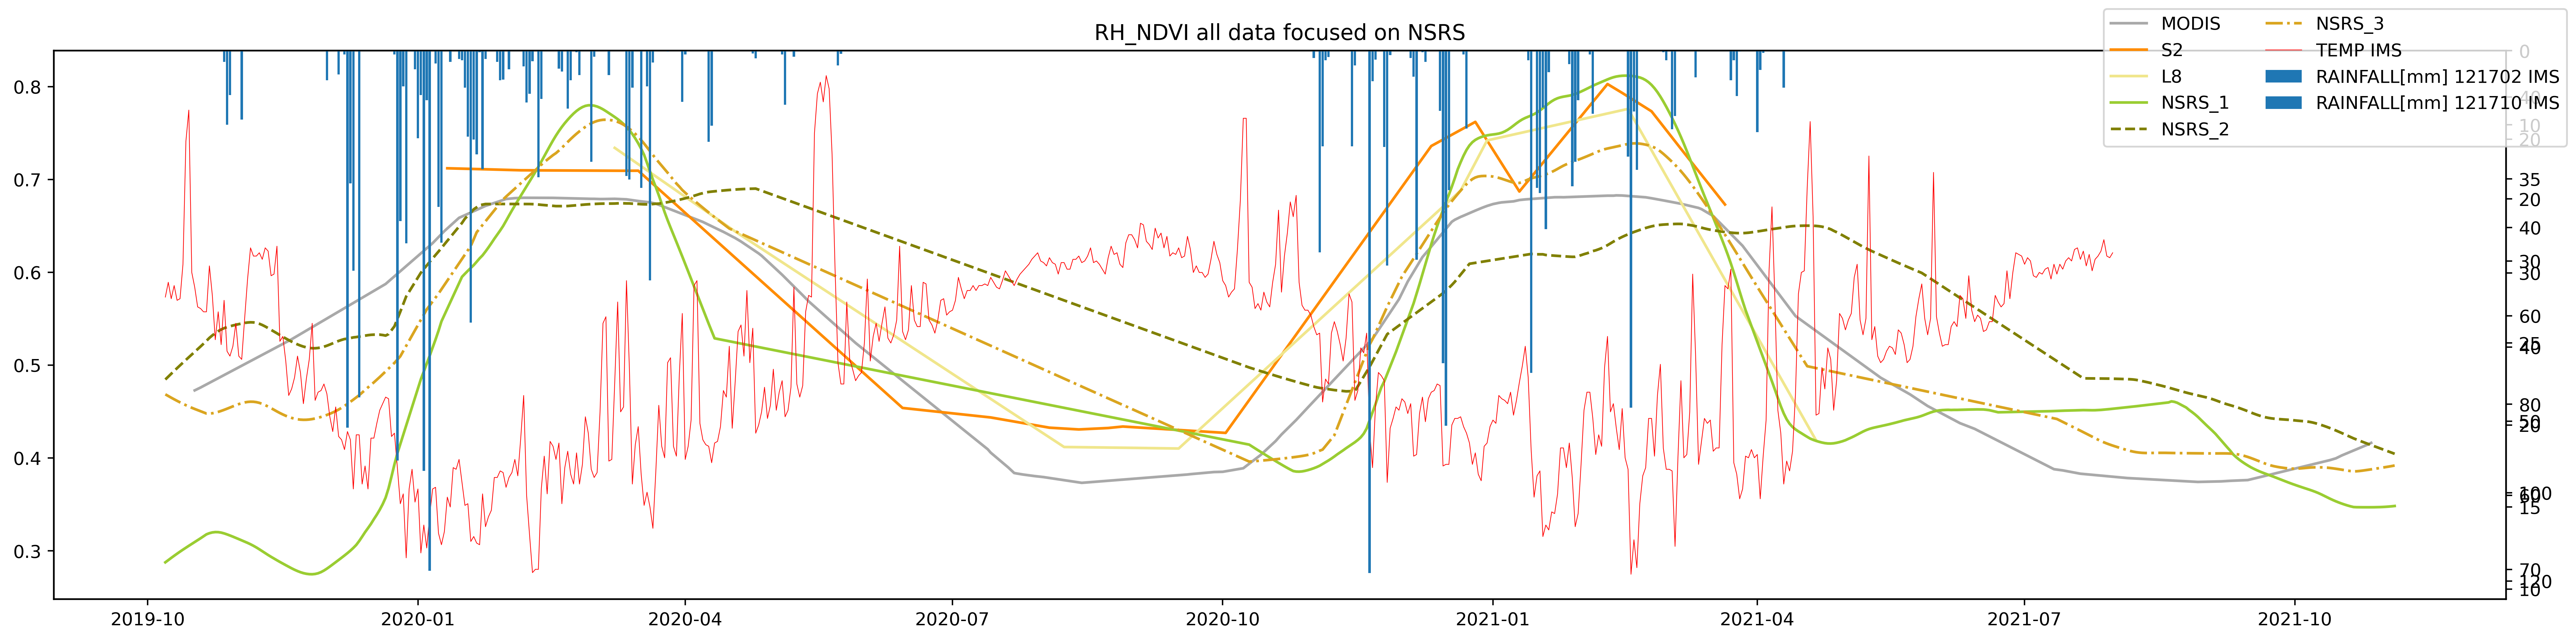

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_correlation_between_two_fields(source_series: pd.Series, target_series: pd.Series):
    correlation = source_series.coor(target_series)
    plt.scatter(source_series, target_series)
    plt.plot(np.unique(source_series), np.poly1d(np.polyfit(source_series, target_series, 1))
         (np.unique(source_series)), color='red')

    plt.xlabel(source_series.name)
    plt.ylabel(target_series.name)
    plt.show()


def unify_nsrs_columns_in_site_df(site_df:pd.DataFrame, common_substring: str):
    relevant_field_names = [field_name for field_name in site_df.keys() if common_substring in field_name]
    # print(relevant_field_names)
    # print(common_substring)
    first_field_name = relevant_field_names[0]
    first_field = site_df[first_field_name]
    for field_name in relevant_field_names[1:]:
        first_field.fillna(site_df[field_name], inplace=True)
        site_df.drop(labels=field_name, axis=1, inplace=True)



test_df = site_df.copy()
for i in range(1,4):
    unify_nsrs_columns_in_site_df(test_df, f'NSRS_{i}')
plot_site_data(site_name, test_df, focus_on_nsrs_time=True)


